<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**Pablo Muñoz y Eduardo Loza

**Fecha:** 20 de octubre del 2020.

**Expediente** : If713423
**Profesor:** Oscar David Jaramillo Zuluaga.
Liga repositorio: https://github.com/HKael/proyecto_modulo1

# NBA:¿Cómo ganar un campeonato?
En este proyecto, nos enfocaremos en analizar los datos históricos de los jugadores de la NBA, desde la producción de puntos por juego hasta el valor de su participación en la institución. Con el fin de poder hacer una mejor estrategia para ganar un campeonato. Tomando en cuenta las estadísticas podremos predecir la ruta para coronar a un equipo campeón, además de estimar un precio medio del equipo con el cual elegiremos a los jugadores.

### Descripción del problema
En el basketbol, como en todos los deportes, hay muchos jugadores infravalorados o muy caros en cuestión de lo que generan en el equipo, queremos reducir el error humano al tener espectatívas por estadísticas anteriores de jugadores en solitario, entonces cada equipo tiene su presupuesto y un límite salarial, a veces eso es lo que ocaciona que no se maximize el rendimiento como equipo para poder ganar un campeonato. Queremos eleminar este problema, queremos que el equipo sea elegido tomando en cuenta los aspectos más relevantes del juego.
### Objetivos.
> #### Objetivo general.
>  - Obtener equipo ideal de jugadores de NBA en cuanto a gasto-rendimiento, para así poder tomar las mejores decisiones sobre que jugadores fichar o vender con la finalidad de quedar campeones al finalizar la temporada.
> ####  Objetivos específicos
>  - Encontrar las variables que aportan mayor producción por posición.
>  - Conocer que jugadores son los mejores por posición en tanto gasto-rendimiento.
>  - Obtener presupuesto ideal para un equipo ganador.
>  - Generar probabilidad de ganar por equipo 

### Supuestos
> - Los equipos son de 10 jugadores con mayor tiempo de juego en la cancha
> - No se toman en cuenta bonos económicos de los jugadores.
> - No se incluye el valor del director técnico por equipo.

### Variables importantes de los datos
> - **Tiempo en cancha del jugador**: Conocer la importancia del jugador en el equipo.
> - **Numero de partidos (Ganados y perdidos)**: Generar la clasificación por equipo en la temporada.
> - **Estadisticas de juego por jugador (Depende la posición)**: Maximizar el rendimiento del jugador.
> - **Salario por jugador**: Obtener el salario óptimo para cada jugador tomando en cuenta la media del costo de un equipo.

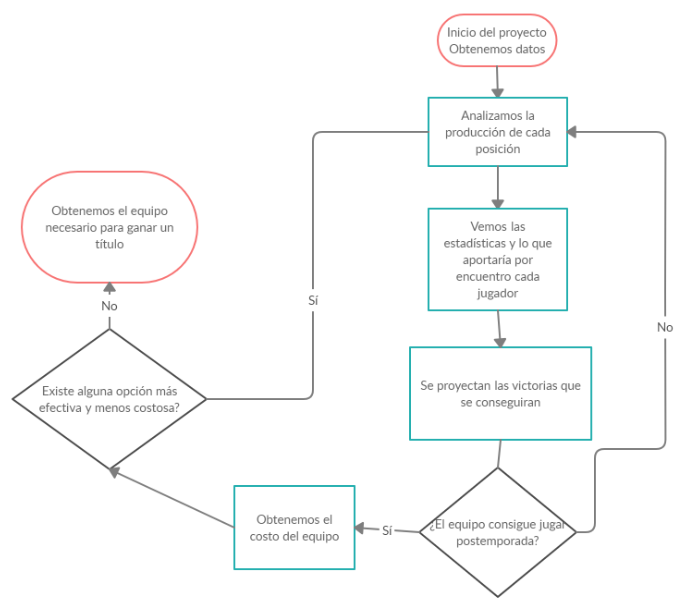

## NODOS A SIMULAR

1. Primero elegimos la producción de cada jugador. Entendiendo que en el basketball cada posición genera una producción distinta, nos decidimos a estudiar los puntos más relevantes de cada posición, con eso en mente podremos saber el valor que cada jugador aporta al equipo.


2. Analizamos el valor que aportan al juego cada jugador dependiendo su posición, esto nos servirá para poder estimar los puntos anotados y los recibidos por encuentro.


3. También se proyectarán las victorias del equipo, estableciendo un mínimo a conseguir para poder competir por el campeonato.



4. El último punto a considerar, será el salario del jugador. Ya que este juega un rol muy importante en los equipos, ya que para la próxima temporada; los equipos tendrán un tope salarial de \$115 millones  de dólares. Además de que se hará una media del costo promedio de un equipo para poder usar el modelo para equipos con dinero o equipos sin dinero.

## HIPÓTESIS 

Con base en nuestro datos, nuestra hipótesis es que existen varias variables que definen el éxito de un equipo, nuestro trabajo es analizar las oportunidades que esto nos da. Para así poder maximizar las posibilidades de que un equipo sea mejor dirigido tomando en cuenta los aspectos que sí definen la trayectoria de un equipo, más que algun otro valor. 

## OBTENEMOS LA BASE DE DATOS

Usaremos las siguientes variables para el proyecto. 



In [2]:
#importar los paquetes que se van a usar
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import vonmises
%matplotlib inline

In [3]:

data = pd.read_csv('C:/Users/TOSHIBAUSER/Desktop/nba_2017_nba_players_with_salary.csv')
data.set_index('PLAYER',inplace=True)
data=data.drop(data.columns[[0, 1]], axis='columns')
data

,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,0.379,5.8,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brice Johnson,PF,22,3.0,0.7,2.3,0.286,0.0,0.0,NaN,0.7,...,3,3.0,-2.32,1.08,-1.24,0.01,10.8,95.72,1,1.33
Mike Tobey,C,22,12.5,0.5,2.0,0.250,0.0,0.0,NaN,0.5,...,2,12.5,-1.91,0.99,-0.92,0.03,-1.6,91.41,0,0.07
Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,0.2,0.000,0.2,...,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,0.06


In [4]:
posicion= pd.DataFrame(data,columns=['POSITION'])
tiros= pd.DataFrame(data,columns=['eFG%'])
triples= pd.DataFrame(data,columns=['3P'])
dobles= pd.DataFrame(data,columns=['2P'])
rebotes= pd.DataFrame(data,columns=['TRB'])
asist= pd.DataFrame(data,columns=['AST'])
dribles= pd.DataFrame(data,columns=['DRB'])
robos= pd.DataFrame(data,columns=['STL'])
bloqueos= pd.DataFrame(data,columns=['BLK'])
puntos= pd.DataFrame(data,columns=['POINTS'])
ofensivos= pd.DataFrame(data,columns=['ORPM'])
defensivos= pd.DataFrame(data,columns=['DRPM'])
salario= pd.DataFrame(data,columns=['SALARY_MILLIONS'])
stats=posicion.join(tiros).join(triples).join(dobles).join(rebotes).join(asist).join(dribles).join(robos).join(bloqueos).join(puntos).join(ofensivos).join(defensivos).join(salario)
stats

,POSITION,eFG%,3P,2P,TRB,AST,DRB,STL,BLK,POINTS,ORPM,DRPM,SALARY_MILLIONS
PLAYER,,,,,,,,,,,,,
Aaron Brooks,PG,0.483,0.7,1.1,1.1,1.9,0.8,0.4,0.1,5.0,-1.81,-1.47,2.70
Aaron Gordon,SF,0.499,1.0,4.0,5.1,1.9,3.6,0.8,0.5,12.7,1.25,-0.78,4.35
Aaron Harrison,SG,0.000,0.0,0.0,0.6,0.6,0.6,0.0,0.0,0.2,-1.42,-0.32,0.87
Adreian Payne,PF,0.454,0.2,1.1,1.8,0.4,1.3,0.4,0.4,3.5,-1.69,1.36,2.02
Al Horford,C,0.527,1.3,4.3,6.8,5.0,5.4,0.8,1.3,14.0,0.76,1.06,26.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Willie Cauley-Stein,C,0.530,0.0,3.4,4.5,1.1,3.4,0.7,0.6,8.1,-2.07,0.90,3.55
Willy Hernangomez,C,0.533,0.1,3.4,7.0,1.3,4.6,0.6,0.5,8.2,-0.75,0.40,1.44
Wilson Chandler,SF,0.520,1.5,4.5,6.5,2.0,5.0,0.7,0.4,15.7,0.30,-1.54,11.23


In [23]:
salario

,SALARY_MILLIONS
PLAYER,
Russell Westbrook,26.50
James Harden,26.50
Isaiah Thomas,6.59
Anthony Davis,22.12
DeMarcus Cousins,16.96
...,...
Brice Johnson,1.33
Mike Tobey,0.07
Alonzo Gee,0.06


No handles with labels found to put in legend.


,POSITION,eFG%,3P,2P,TRB,AST,DRB,STL,BLK,POINTS,ORPM,DRPM,SALARY_MILLIONS
PLAYER,,,,,,,,,,,,,
Aaron Brooks,PG,0.483,0.7,1.1,1.1,1.9,0.8,0.4,0.1,5.0,-1.81,-1.47,2.70
Andrew Harrison,PG,0.385,0.6,1.0,1.9,2.8,1.6,0.7,0.3,5.9,-1.20,-0.38,1.31
Brandon Jennings,PG,0.433,1.0,1.4,2.4,4.9,2.1,0.9,0.0,7.1,0.25,-1.50,5.00
Briante Weber,PG,0.425,0.1,1.2,1.3,1.1,0.9,0.6,0.1,3.1,-2.02,-1.29,1.47
Cameron Payne,PG,0.402,0.9,1.2,1.5,1.8,1.5,0.5,0.1,5.2,-4.14,-0.31,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tony Parker,PG,0.486,0.4,3.8,1.8,4.5,1.7,0.5,0.0,10.1,-0.69,-0.97,14.45
Trey Burke,PG,0.516,0.5,1.5,0.8,1.8,0.7,0.2,0.1,5.0,-2.15,-3.09,3.39
Tyler Ennis,PG,0.498,0.5,1.2,0.8,1.6,0.7,0.5,0.0,4.3,-1.36,-0.51,1.73


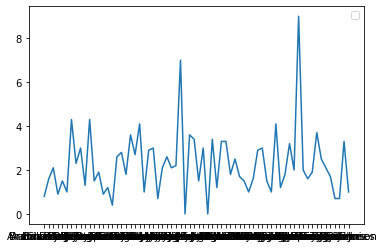

In [5]:
stats_pg = stats[stats['POSITION'] == 'PG']
plt.plot(stats_pg['DRB'], label='')
plt.legend()
stats_pg

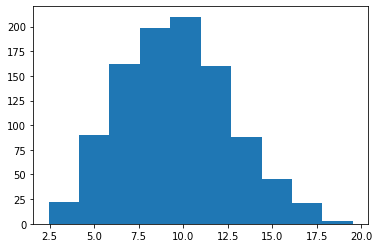

La estadística promedio del Base es:  9.584015711758907
Con una confianza de 0.95 la media estará en el intervalo normal,
 (9.396837349430898, 9.771194074086916)


In [6]:
confianza=.95
drb=np.random.triangular(0,2.2,9,1000)
ast=np.random.triangular(0.2,3.2,11.2,1000)
stl=np.random.triangular(0,1.2,2,1000)

pg= list(map(lambda a,b,c:a+b+c,drb,ast,stl))
plt.hist(pg)
plt.show()
print("La estadística promedio del Base es: ", np.mean(pg))
i_pg = st.norm.interval(confianza, loc=np.mean(pg), scale=st.sem(pg))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i_pg))

In [7]:
stats_c = stats[stats['POSITION'] == 'C']
stats_c.min()

POSITION               C
eFG%               0.231
3P                     0
2P                   0.4
TRB                  0.9
AST                    0
DRB                  0.5
STL                    0
BLK                    0
POINTS                 1
ORPM               -4.43
DRPM               -1.41
SALARY_MILLIONS     0.07
dtype: object

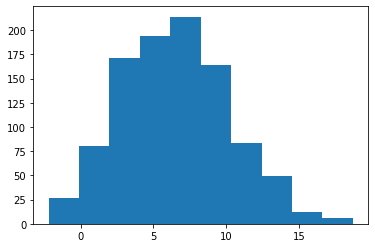

La estadística promedio del Centro es:  6.54148646447586
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6.314728951092084, 6.768243977859637)


[6.418215563484626,
 10.304762734783665,
 6.494968838774527,
 3.7071860243310297,
 7.724429453806939,
 13.16473870196725,
 4.656183211924024,
 7.268388494022901,
 5.139042676611195,
 5.5698858115652,
 6.573822916891025,
 9.5233097309766,
 6.598077908734773,
 7.138298109560349,
 8.09241157309405,
 14.774135198829244,
 6.5804964991303585,
 4.797397410622858,
 2.086139611805785,
 4.9182358124846814,
 8.091786684412199,
 8.5323865321765,
 10.946874826002144,
 11.403750862494897,
 8.043242314449706,
 8.508631257413333,
 7.757492036767449,
 9.324491357491382,
 0.7113997722850098,
 4.210813481166996,
 10.45859423701939,
 11.01830734029183,
 9.072313731807258,
 4.68999038575247,
 3.3898548738923724,
 -1.4182928493762526,
 7.729968275884627,
 -1.163719034893103,
 4.550470830567363,
 16.696175081763382,
 3.9434119699044183,
 10.30816857120708,
 6.642585610433522,
 5.422473242149465,
 8.00191228342399,
 4.541816669612069,
 8.5724015852867,
 4.360599740538243,
 7.608534166302238,
 9.64905174346643

In [8]:
orpm=np.random.triangular(-4.43,-2.8,4.4,1000)
drpm=np.random.triangular(-1.41,-.2,6,1000)
p3=np.random.triangular(0,.1,1.9,1000)
trb=np.random.triangular(0.9,1.7,12.8,1000)

c= list(map(lambda a,b,c,d:a+b+c+d,drpm,p3,trb,orpm))
plt.hist(c)
plt.show()
print("La estadística promedio del Centro es: ", np.mean(c))
i_c = st.norm.interval(confianza, loc=np.mean(c), scale=st.sem(c))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i_c))
c

In [9]:
stats_sf = stats[stats['POSITION'] == 'SF']
stats_sf.max()

POSITION              SF
eFG%               0.605
3P                   2.6
2P                   8.3
TRB                  8.8
AST                  8.7
DRB                  7.6
STL                  1.9
BLK                  1.9
POINTS              26.4
ORPM                6.49
DRPM                3.13
SALARY_MILLIONS    30.96
dtype: object

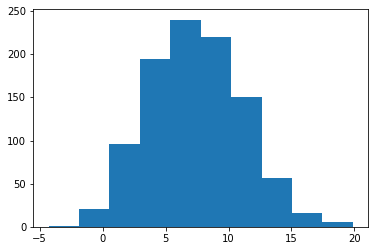

La estadística promedio del Alero es:  7.34212628765838
Con una confianza de 0.95 la media estará en el intervalo normal,
 (7.111514481738605, 7.572738093578155)


In [10]:
orpm=np.random.triangular(-4.4,-2.6,6.5,1000)
drpm=np.random.triangular(-3.92,-.6,3.13,1000)
p3=np.random.triangular(0,.1,2.6,1000)
trb=np.random.triangular(0.7,1.6,8.8,1000)
drb=np.random.triangular(0.5,1.2,7.6,1000)

sf= list(map(lambda a,b,c,d,e:a+b+c+d+e,drpm,p3,trb,orpm,drb))
plt.hist(sf)
plt.show()
print("La estadística promedio del Alero es: ", np.mean(sf))
i_sf = st.norm.interval(confianza, loc=np.mean(sf), scale=st.sem(sf))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i_sf))

In [11]:
stats_sg = stats[stats['POSITION'] == 'SG']
stats_sg.max()

POSITION              SG
eFG%               0.632
3P                   3.4
2P                   6.2
TRB                  6.2
AST                  5.9
DRB                  5.6
STL                  1.6
BLK                  0.8
POINTS              23.1
ORPM                3.29
DRPM                2.15
SALARY_MILLIONS     23.2
dtype: object

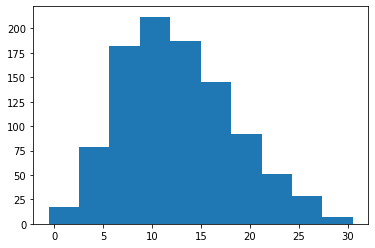

La estadística promedio del Escolta es:  12.627360525320697
Con una confianza de 0.95 la media estará en el intervalo normal,
 (12.2716072910095, 12.983113759631893)


In [12]:
orpm=np.random.triangular(-3.44,-2.2,3.29,1000)
drpm=np.random.triangular(-3.39,-.2,2.15,1000)
drb=np.random.triangular(0.4,.9,5.6,1000)
ast=np.random.triangular(0.1,.5,5.9,1000)
stl=np.random.triangular(0,0.2,1.6,1000)
pts=np.random.triangular(0.2,3.7,23.1,1000)

sg= list(map(lambda a,b,c,d,e,f:a+b+c+d+e+f,drb,ast,stl,orpm,drpm,pts))
plt.hist(sg)
plt.show()
print("La estadística promedio del Escolta es: ", np.mean(sg))
i_sg = st.norm.interval(confianza, loc=np.mean(sg), scale=st.sem(sg))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i_sg))

In [13]:
stats_pf = stats[stats['POSITION'] == 'PF']
stats_pf

,POSITION,eFG%,3P,2P,TRB,AST,DRB,STL,BLK,POINTS,ORPM,DRPM,SALARY_MILLIONS
PLAYER,,,,,,,,,,,,,
Adreian Payne,PF,0.454,0.2,1.1,1.8,0.4,1.3,0.4,0.4,3.5,-1.69,1.36,2.02
Amir Johnson,PF,0.612,0.3,2.3,4.6,1.8,3.1,0.6,0.8,6.5,0.22,3.58,12.00
Andrew Nicholson,PF,0.410,0.1,1.0,1.6,0.3,1.2,0.4,0.2,2.6,-3.54,-0.67,6.09
Anthony Bennett,PF,0.484,0.6,1.1,3.4,0.5,2.3,0.2,0.1,5.0,-0.76,-1.29,1.02
Blake Griffin,PF,0.513,0.6,7.2,8.1,4.9,6.3,0.9,0.4,21.6,3.02,0.76,20.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,PF,0.560,0.6,4.3,6.1,1.6,4.3,1.5,0.4,11.0,-1.09,1.94,14.15
Tobias Harris,PF,0.532,1.3,4.9,5.1,1.7,4.3,0.7,0.5,16.1,1.19,-0.25,17.20
Trevor Booker,PF,0.537,0.4,3.9,8.0,1.9,6.0,1.1,0.4,10.0,-2.29,2.00,9.25


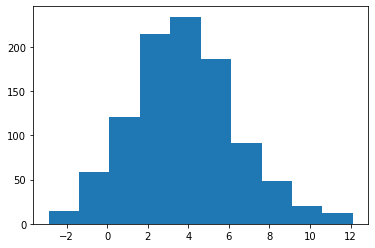

La estadística promedio del Ala-Pivot es:  3.802274916861019
Con una confianza de 0.95 la media estará en el intervalo normal,
 (3.642324174273795, 3.962225659448243)


In [14]:
orpm=np.random.triangular(-3.44,-2.2,3.29,1000)
drpm=np.random.triangular(-3.39,-.2,2.15,1000)
drb=np.random.triangular(0.4,.9,5.6,1000)
ast=np.random.triangular(0.1,.5,5.9,1000)
p2=np.random.triangular(0,0.2,1.6,1000)

pf= list(map(lambda a,b,c,d,e:a+b+c+d+e,drb,ast,p2,orpm,drpm))
plt.hist(pf)
plt.show()
print("La estadística promedio del Ala-Pivot es: ", np.mean(pf))
i_pf = st.norm.interval(confianza, loc=np.mean(pf), scale=st.sem(pf))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i_pf))

Como la mayoría de las gráficas presentan un comportamiento normal, ajustamos para esa distribución.

In [40]:
import pandas as pd
import scipy.stats as ss
import scipy as sp

In [ ]:
measurements = np.random.normal(loc = stats_pg, scale = dsvpg, size=10000)
plt.figure(1,figsize=[12,4])
plt.subplot(6,2,1)
plt.hist(measurements,20,density=True)
x = np.arange(-15,30,.5)
y = st.norm.pdf(x,loc = mpg, scale = dsvpg)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()

plt.subplot(6,2,2)
grap1 = st.probplot(measurements, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')


Ahora para el segundo nodo, el costo del jugador al equipo.